# Exploring the general information data endpoint

## Loadind libraries

In [2]:
from pathlib import Path as path

from processing import load_data

import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml

In [3]:
pd.options.display.max_columns=100
pd.options.display.max_rows=100

In [4]:
def data_from_date(date:datetime.date):

    date_as_string = date.strftime("%Y-%m-%d")

    with open('datapath.yml') as f:
        datapath = yaml.safe_load(f)

    dataset_path = datapath['dataset_path']

    data_dict = load_data(path(dataset_path,f'{date_as_string}.json'))

    return data_dict

data_dict = data_from_date(datetime.date(2023,2,23)-datetime.timedelta(days=3))

Loaded data: 
-------------
1. events
2. game_settings
3. phases
4. teams
5. total_players
6. elements
7. element_stats
8. element_types


In [40]:
teams_df = pd.DataFrame(data_dict['teams'])
elements_df = pd.DataFrame(data_dict['elements'])
events_df = pd.DataFrame(data_dict['events'])
phases_df = pd.DataFrame(data_dict['phases'])

In [6]:
elements_df[elements_df['id']==data_dict['events'][23]['most_captained']]['web_name']

470    Haaland
Name: web_name, dtype: object

## Exploring the elements dataframe

In [7]:
elements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 88 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   chance_of_playing_next_round          515 non-null    float64
 1   chance_of_playing_this_round          514 non-null    float64
 2   code                                  746 non-null    int64  
 3   cost_change_event                     746 non-null    int64  
 4   cost_change_event_fall                746 non-null    int64  
 5   cost_change_start                     746 non-null    int64  
 6   cost_change_start_fall                746 non-null    int64  
 7   dreamteam_count                       746 non-null    int64  
 8   element_type                          746 non-null    int64  
 9   ep_next                               746 non-null    object 
 10  ep_this                               746 non-null    object 
 11  event_points       

In [8]:
elements_df.head(20)

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,NaN,NaN,84450,0,0,-1,1,1,3,6.2,3.1,2,Granit,2.6,3,False,,None,49,84450.jpg,3.8,Xhaka,2.8,False,None,a,1,3,87,834648,4999,713931,6558,0.5,17.8,Xhaka,1946,3,5,8,23,0,0,0,3,0,0,7,378,434.4,500.7,336.0,127.2,23,2.20,2.95,5.15,22.37,50,20,20,15,64,42,31,22,NaN,,3.0,,NaN,,0.10,0.0,0.14,0.24,1.03,1.06,235,134,125,57,75,34,109,35,1.06,0.37
1,0.0,0.0,153256,0,0,-4,4,1,3,0.0,0.0,0,Mohamed,0.0,4,False,Knee injury - Unknown return date,2023-01-26T10:00:07.778526Z,41,153256.jpg,1.2,Elneny,0.7,False,None,i,1,3,6,197620,382,266417,1749,0.0,1.5,Elneny,111,0,0,0,2,0,0,0,0,0,0,0,27,4.6,5.4,0.0,1.1,1,0.00,0.04,0.04,1.29,476,217,429,211,552,222,478,220,NaN,,NaN,,NaN,,0.00,0.0,0.03,0.03,1.05,1.62,624,321,482,176,402,174,229,70,0.81,0.00
2,NaN,NaN,156074,0,0,-3,3,0,2,1.8,0.9,1,Rob,0.4,5,False,,None,42,156074.jpg,1.0,Holding,0.1,False,None,a,1,3,7,7027,42,18120,76,0.1,1.7,Holding,17,0,0,0,0,0,0,0,0,0,0,0,23,3.4,0.1,0.0,0.3,0,0.00,0.00,0.00,0.28,483,172,489,177,559,222,501,177,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,1.48,0.00,596,169,324,107,440,164,431,161,0.00,0.00
3,75.0,75.0,167199,0,0,-3,3,0,3,2.5,1.3,0,Thomas,1.2,6,False,Muscle injury - 75% chance of playing,2023-02-15T22:30:09.735511Z,47,167199.jpg,3.2,Partey,0.4,False,None,d,1,3,57,99412,110,129676,1460,0.3,12.1,Partey,1540,2,0,9,11,0,0,0,2,0,0,5,286,342.8,293.1,172.0,80.9,18,1.63,0.95,2.59,17.46,98,42,65,53,146,91,91,62,NaN,,NaN,,NaN,,0.10,0.0,0.06,0.15,1.02,0.64,315,191,237,105,136,60,271,87,1.05,0.53
4,100.0,100.0,184029,0,0,5,-5,4,3,8.6,4.3,8,Martin,3.8,7,True,,2022-09-18T20:00:06.315087Z,70,184029.jpg,6.0,Ødegaard,37.8,False,None,a,1,3,131,5148315,89468,2679006,31215,0.5,18.7,Ødegaard,1868,8,7,8,22,0,0,0,3,0,0,21,499,572.6,744.3,600.0,191.9,22,6.02,5.37,11.43,21.91,15,5,6,5,21,12,8,6,3.0,,1.0,,NaN,,0.29,0.0,0.26,0.55,1.06,1.06,41,20,68,26,8,3,4,2,1.06,0.39
5,100.0,100.0,192895,0,0,-4,4,0,2,1.4,0.7,1,Kieran,0.2,8,False,,2022-09-26T13:00:06.430643Z,46,192895.jpg,1.4,Tierney,0.7,False,None,a,1,3,23,75062,198,145775,609,0.0,5.0,Tierney,459,0,0,1,5,0,0,0,0,0,0,0,98,75.4,57.1,45.0,17.8,4,0.26,0.26,0.51,4.16,337,136,277,85,305,95,344,123,NaN,,NaN,,NaN,,0.05,0.0,0.05,0.10,0.82,0.98,339,59,371,129,380,142,211,78,0.78,0.20
6,0.0,0.0,195735,0,0,-2,2,0,3,0.0,0.0,0,Nicolas,0.0,9,False,Season-long loan to Nice,2022-08-26T07:24:29.541862Z,53,195735.jpg,0.0,Pépé,0.1,False,None,u,1,3,0,5198,0,36585,14,0.0,0.0,Pépé,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,736,318,734,318,732,317,737,318,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,158,88,711,306,737,318,438,158,0.00,0.00
7,NaN,NaN,198869,0,0,2,-2,0,2,3.4,1.7,1,Benjamin,1.2,10,False,,None,47,198869.jpg,3.9,White,12.9,False,N

In [9]:
elements_df.dtypes.value_counts()

int64      47
object     26
float64    13
bool        2
dtype: int64

### Boolean Features

In [10]:
elements_bool_features = elements_df.select_dtypes(include="bool")
elements_bool_features

,in_dreamteam,special
0,False,False
1,False,False
2,False,False
3,False,False
4,True,False
...,...,...
741,False,False
742,False,False
743,False,False
744,False,False


In [11]:
elements_bool_features["special"].value_counts()

False    746
Name: special, dtype: int64

In [12]:
elements_bool_features["in_dreamteam"].value_counts()

False    735
True      11
Name: in_dreamteam, dtype: int64

In [13]:
elements_df[elements_df['in_dreamteam']].sort_values('element_type')[['first_name','second_name','web_name']]

,first_name,second_name,web_name
117,David,Raya Martin,Raya
21,William,Saliba,Saliba
529,Kieran,Trippier,Trippier
538,Fabian,Schär,Schär
4,Martin,Ødegaard,Ødegaard
10,Bukayo,Saka,Saka
455,Kevin,De Bruyne,De Bruyne
494,Marcus,Rashford,Rashford
541,Miguel,Almirón Rejala,Almirón
470,Erling,Haaland,Haaland


In [14]:
# columns that can be dropped from the elements dataframe
not_useful_columns_elements_df = ['special']

### Categorical Features

In [15]:
elements_categorical_features = elements_df.select_dtypes(include='object')
elements_categorical_features.head(5)

,ep_next,ep_this,first_name,form,news,news_added,photo,points_per_game,second_name,selected_by_percent,squad_number,status,value_form,value_season,web_name,influence,creativity,threat,ict_index,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,corners_and_indirect_freekicks_text,direct_freekicks_text,penalties_text
0,6.2,3.1,Granit,2.6,,None,84450.jpg,3.8,Xhaka,2.8,None,a,0.5,17.8,Xhaka,434.4,500.7,336.0,127.2,2.20,2.95,5.15,22.37,,,
1,0.0,0.0,Mohamed,0.0,Knee injury - Unknown return date,2023-01-26T10:00:07.778526Z,153256.jpg,1.2,Elneny,0.7,None,i,0.0,1.5,Elneny,4.6,5.4,0.0,1.1,0.00,0.04,0.04,1.29,,,
2,1.8,0.9,Rob,0.4,,None,156074.jpg,1.0,Holding,0.1,None,a,0.1,1.7,Holding,3.4,0.1,0.0,0.3,0.00,0.00,0.00,0.28,,,
3,2.5,1.3,Thomas,1.2,Muscle injury - 75% chance of playing,2023-02-15T22:30:09.735511Z,167199.jpg,3.2,Partey,0.4,None,d,0.3,12.1,Partey,342.8,293.1,172.0,80.9,1.63,0.95,2.59,17.46,,,
4,8.6,4.3,Martin,3.8,,2022-09-18T20:00:06.315087Z,184029.jpg,6.0,Ødegaard,37.8,None,a,0.5,18.7,Ødegaard,572.6,744.3,600.0,191.9,6.02,5.37,11.43,21.91,,,


In [16]:
elements_categorical_features['status'].value_counts()

a    493
u    162
i     58
d     33
Name: status, dtype: int64

In [17]:
elements_categorical_features[elements_categorical_features['status']=='d'].head()

,ep_next,ep_this,first_name,form,news,news_added,photo,points_per_game,second_name,selected_by_percent,squad_number,status,value_form,value_season,web_name,influence,creativity,threat,ict_index,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,corners_and_indirect_freekicks_text,direct_freekicks_text,penalties_text
3,2.5,1.3,Thomas,1.2,Muscle injury - 75% chance of playing,2023-02-15T22:30:09.735511Z,167199.jpg,3.2,Partey,0.4,None,d,0.3,12.1,Partey,342.8,293.1,172.0,80.9,1.63,0.95,2.59,17.46,,,
79,0.1,1.2,Jefferson,1.7,Illness - 75% chance of playing,2023-02-18T21:30:07.856788Z,152551.jpg,2.4,Lerma Solís,0.4,None,d,0.4,11.7,Lerma,365.0,153.3,178.0,69.4,1.31,1.17,2.49,37.24,,,
91,1.3,2.8,Jordan,3.3,Knock - 75% chance of playing,2023-02-18T21:30:07.877306Z,447932.jpg,2.6,Zemura,0.1,None,d,0.8,10.5,Zemura,232.8,215.9,69.0,51.6,0.47,1.63,2.11,23.39,,,
95,1.1,2.5,Marcus,3.0,Hamstring injury - 75% chance of playing,2023-02-18T21:30:08.342911Z,201658.jpg,4.1,Tavernier,0.2,None,d,0.6,14.9,Tavernier,322.8,267.9,347.0,93.8,2.45,1.01,3.51,25.11,,,
188,0.8,1.5,César,1.0,Head injury - 75% chance of playing,2023-02-18T21:30:07.912657Z,41328.jpg,2.1,Azpilicueta,1.4,None,d,0.2,8.3,Azpilicueta,216.8,170.8,84.0,47.4,0.29,0.99,1.28,16.18,,,


In [18]:
elements_categorical_to_numerical = ['ep_next',
                                     'ep_this',
                                     'form',
                                     'points_per_game',
                                     'selected_by_percent',
                                     'value_form','value_season',
                                     'influence','creativity',
                                     'threat','ict_index',
                                     'expected_goals',
                                     'expected_assists',
                                     'expected_goal_involvements',
                                     'expected_goals_conceded']

In [19]:
elements_df[elements_df['second_name']=='Haaland'][['id','ep_this','ep_next']]

,id,ep_this,ep_next
470,318,7.2,7.7


In [20]:
# (elements_df[elements_df.team.isin(id_list)]
df = (elements_df#[elements_df.element_type==1]
    [['team','web_name','form','points_per_game','bps','status','minutes','bonus','element_type','now_cost']]
    .sort_values('bps',ascending=False)
    .head(50)
    .groupby(['team'])
    .sum(numeric_only=True)
    .rename(index = lambda x: teams_df['short_name'][x-1])
    .sort_values('bps',ascending=False)
)

df

,bps,minutes,bonus,element_type,now_cost
team,,,,,
ARS,3078,13761,77,16,404
NEW,2731,11582,66,12,315
MUN,2102,9530,53,11,320
MCI,2083,7883,52,11,356
TOT,1851,8091,51,10,279
BRE,1335,5879,45,7,174
LIV,1293,5099,31,5,195
WOL,1194,6120,31,6,148
BHA,1159,5792,33,7,152


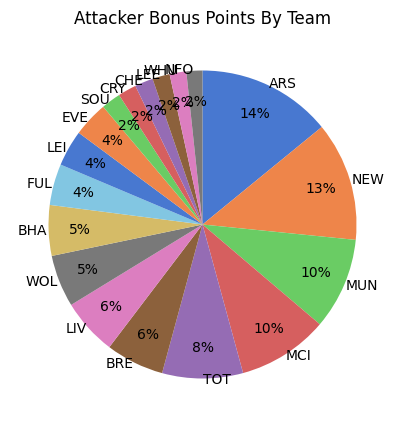

In [52]:
fig, ax = plt.subplots(figsize=(5,5), nrows=1, ncols=1,)

plt.pie(x = df['bps'],
            labels=df.index.to_list(),
            counterclock=False,
            startangle=90,
            autopct='%.0f%%',
            labeldistance=1.01,
            pctdistance=0.8,
            textprops={'fontsize':'medium'},
            colors=sns.color_palette('muted'),
        );

plt.title("Attacker Bonus Points By Team");

In [35]:
if events_df.index.name != 'id':
    events_df.set_index(['id'],inplace=True)
events_df.tail(10)

,name,deadline_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,is_next,cup_leagues_created,h2h_ko_matches_created,chip_plays,most_selected,most_transferred_in,top_element,top_element_info,transfers_made,most_captained,most_vice_captained
id,,,,,,,,,,,,,,,,,,,,,,
29,Gameweek 29,2023-04-01T12:30:00Z,0,False,False,NaN,1680352200,0,NaN,False,False,False,False,False,[],NaN,NaN,NaN,None,0,NaN,NaN
30,Gameweek 30,2023-04-08T12:30:00Z,0,False,False,NaN,1680957000,0,NaN,False,False,False,False,False,[],NaN,NaN,NaN,None,0,NaN,NaN
31,Gameweek 31,2023-04-15T12:30:00Z,0,False,False,NaN,1681561800,0,NaN,False,False,False,False,False,[],NaN,NaN,NaN,None,0,NaN,NaN
32,Gameweek 32,2023-04-22T12:30:00Z,0,False,False,NaN,1682166600,0,NaN,False,False,False,False,False,[],NaN,NaN,NaN,None,0,NaN,NaN
33,Gameweek 33,2023-04-25T17:15:00Z,0,False,False,NaN,1682442900,0,NaN,False,False,False,False,False,[],NaN,NaN,NaN,None,0,NaN,NaN
34,Gameweek 34,2023-04-29T12:30:00Z,0,False,False,NaN,1682771400,0,NaN,False,False,False,False,False,[],NaN,NaN,NaN,None,0,NaN,NaN
35,Gameweek 35,2023-05-06T12:30:00Z,0,False,False,NaN,1683376200,0,NaN,False,False,False,False,False,[],NaN,NaN,NaN,None,0,NaN,NaN
36,Gameweek 36,2023-05-13T12:30:00Z,0,False,False,NaN,1683981000,0,NaN,False,False,False,False,False,[],NaN,NaN,NaN,None,0,NaN,NaN
37,Gameweek 37,2023-05-20T12:30:00Z,0,False,False,NaN,1684585800,0,NaN,False,False,False,False,False,[],NaN,NaN,NaN,None,0,NaN,NaN
